In [0]:
!pip install tensorflow==2.0.0 -q

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


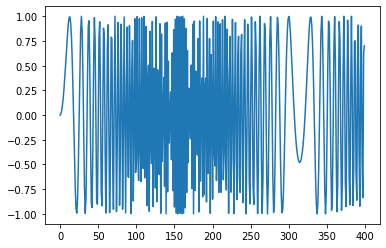

In [4]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.show()

In [5]:
#creating dataset
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:T+t]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X: " + str(X.shape)+ " y: " + str(Y.shape))

X: (390, 10) y: (390,)


In [15]:
N

390

In [0]:
#autoregressive Model
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)

In [10]:
model.compile(
    loss='mse',
    optimizer = Adam(0.01)
)

r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), epochs=80)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 2ms/sample - loss: 0.8178 - val_loss: 0.6381
Epoch 2/80
195/195 [==============================] - 0s 153us/sample - loss: 0.5595 - val_loss: 0.7018
Epoch 3/80
195/195 [==============================] - 0s 152us/sample - loss: 0.5485 - val_loss: 0.6115
Epoch 4/80
195/195 [==============================] - 0s 148us/sample - loss: 0.5287 - val_loss: 0.6615
Epoch 5/80
195/195 [==============================] - 0s 146us/sample - loss: 0.5341 - val_loss: 0.7150
Epoch 6/80
195/195 [==============================] - 0s 208us/sample - loss: 0.5428 - val_loss: 0.6508
Epoch 7/80
195/195 [==============================] - 0s 153us/sample - loss: 0.5269 - val_loss: 0.6260
Epoch 8/80
195/195 [==============================] - 0s 198us/sample - loss: 0.5265 - val_loss: 0.6401
Epoch 9/80
195/195 [==============================] - 0s 147us/sample - loss: 0.5672 - val_loss: 0.6758
Epoch 10/80
195/195 

In [11]:
#1-step forecast

output = model.predict(X[-N//2:])
print(output.shape)

(195, 1)


In [0]:
predictions = output[:,0]

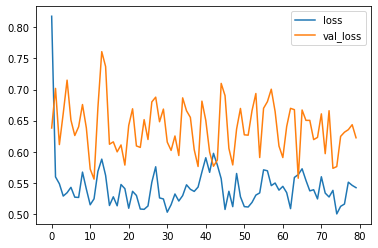

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

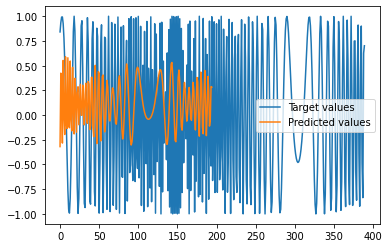

In [14]:
plt.plot(Y, label = 'Target values')
plt.plot(predictions, label = 'Predicted values')
plt.legend()

In [0]:
#Multi-step forecast
validation_target = Y[-N//2:]
validation_prediction = []

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  validation_prediction.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p 

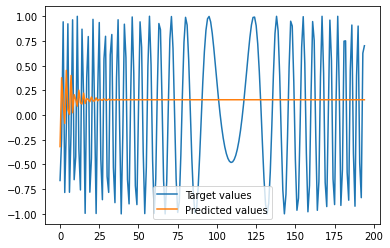

In [18]:
plt.plot(validation_target, label = 'Target values')
plt.plot(validation_prediction, label = 'Predicted values')
plt.legend()

In [0]:
#Building an RNN model
X = X.reshape(-1,T,1)

i = Input(shape=(T,1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)

model = Model(i,x)

In [20]:
model.compile(
    loss = 'mse',
    optimizer = Adam(0.05)
)

r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), epochs=200, batch_size=32)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 1s 6ms/sample - loss: 0.5096 - val_loss: 0.5546
Epoch 2/200
195/195 [==============================] - 0s 250us/sample - loss: 0.4520 - val_loss: 0.5562
Epoch 3/200
195/195 [==============================] - 0s 296us/sample - loss: 0.4261 - val_loss: 0.5177
Epoch 4/200
195/195 [==============================] - 0s 252us/sample - loss: 0.3491 - val_loss: 0.3531
Epoch 5/200
195/195 [==============================] - 0s 252us/sample - loss: 0.2866 - val_loss: 0.2598
Epoch 6/200
195/195 [==============================] - 0s 246us/sample - loss: 0.2252 - val_loss: 0.2502
Epoch 7/200
195/195 [==============================] - 0s 256us/sample - loss: 0.1596 - val_loss: 0.1996
Epoch 8/200
195/195 [==============================] - 0s 250us/sample - loss: 0.1391 - val_loss: 0.1857
Epoch 9/200
195/195 [==============================] - 0s 261us/sample - loss: 0.1286 - val_loss: 0.1474
Epoch 10/20

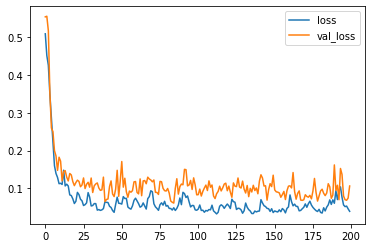

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [22]:
#1-step multicast prediction

output = model.predict(X[:-N//2])
print(output.shape)
predictions = output[:,0]

(195, 1)


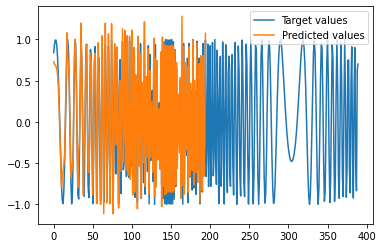

In [23]:
plt.plot(Y, label = 'Target values')
plt.plot(predictions, label = 'Predicted values')
plt.legend()

In [25]:
#Multicast prediction

validation_target = Y[-N//2:]
validation_prediction = []

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]

  validation_prediction.append(p)

  last_x = np.roll(last_x, -1)
  last_x = p


plt.plot(validation_target, label = 'Target values')
plt.plot(validation_prediction, label = 'Predicted values')
plt.legend()


ValueError: ignored